# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-09-30 19:14:05--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2024-09-30 19:14:06 (3.93 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]


print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
### YOUR CODE HERE
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
# ! pip install mljar-scikit-plot
# %pip install scipy==1.11.4

In [8]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm
from scikitplot.metrics import plot_roc

100%|██████████| 35/35 [00:21<00:00,  1.65it/s]


cv_score depend on C, let's take c=3.3


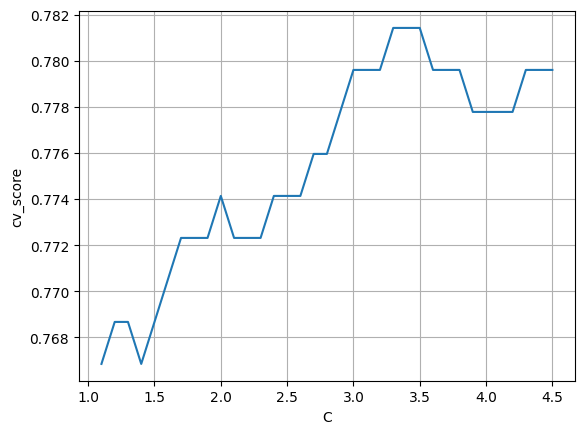

In [9]:
start = 1.1
stop = 4.5
step = 0.1
cv_score = []
max_cv = 0
best_c = start
mass_of_c = np.arange(start, stop+step, step)
for c in tqdm(mass_of_c):
    regr = LogisticRegression(C=c, penalty='l2', solver='saga', tol=1e-3, max_iter=500, random_state=42)
    cv = np.mean(cross_val_score(regr, X_train, y_train, cv=3))
    cv_score.append(cv)
    if cv > max_cv:
        best_c = c
        max_cv = cv

print(f"cv_score depend on C, let's take c={round(best_c, 5)}")
plt.plot(mass_of_c, cv_score)
plt.xlabel("C")
plt.ylabel("cv_score")
plt.grid()


f1 micro 0.819672131147541
f1 macro 0.8218988101892786
f1 weighted 0.8173238248611098
accuracy 0.819672131147541


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

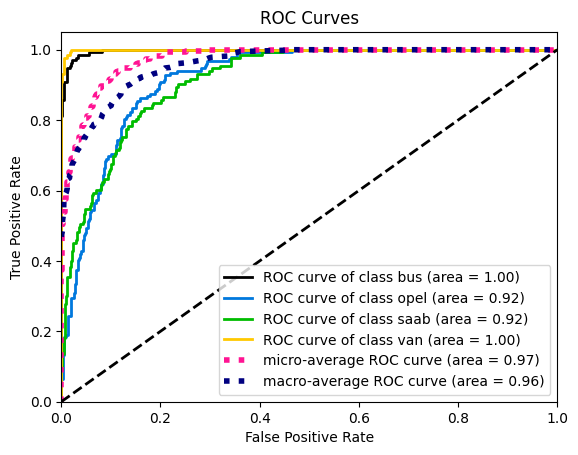

In [10]:
regr = LogisticRegression(C=best_c, penalty='l2', solver='saga', tol=1e-3, max_iter=500, random_state=42).fit(X_train, y_train)
y_pred = regr.predict(X_train)
print("f1 micro", f1_score(y_train, y_pred, average='micro'))
print("f1 macro", f1_score(y_train, y_pred, average='macro'))
print("f1 weighted", f1_score(y_train, y_pred, average='weighted'))
print("accuracy", accuracy_score(y_train, y_pred))

plot_roc(y_train, regr.predict_proba(X_train))


In [11]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot
# %pip install scipy==1.11.4

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

<Axes: >

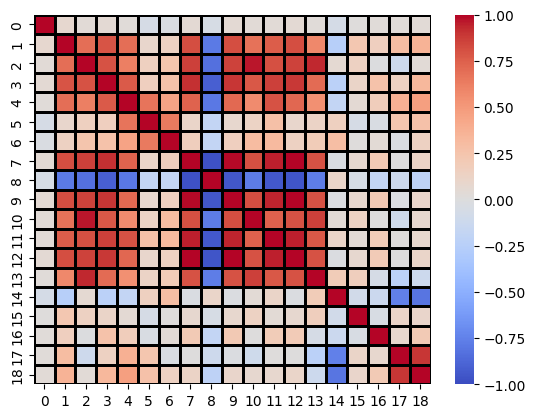

In [12]:
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.DataFrame(data)
sns.heatmap(df.corr(), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [13]:
pca = PCA(n_components=8).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# оставлял только те признаки которые, не сильно коррелируют с другими
# например 1ый признак, коррелирует с 2-4, 7-13 их выкинул,
# остались [0,5,6,14,15,16,17,18], len[] = 8


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [14]:
%%time
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)

from sklearn.model_selection import GridSearchCV

pca = PCA()
scaler = StandardScaler()

logistic = LogisticRegression(penalty='l2', solver='saga', tol=1e-3, max_iter=500, random_state=42)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

start = 2.7
stop = 4.5
step = 0.1
param_grid = {
    "pca__n_components": np.arange(8, X_train.shape[1]),
    "logistic__C": np.arange(start, stop+step, step),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print("logistic__C :", search.best_params_["logistic__C"])
print("pca__n_components :", search.best_params_["pca__n_components"])



Best parameter (CV score=0.791):
logistic__C : 4.200000000000001
pca__n_components : 16
CPU times: user 2.37 s, sys: 198 ms, total: 2.57 s
Wall time: 1min 23s


f1 micro 0.819672131147541
f1 macro 0.8218615956534172
f1 weighted 0.8171441771843989
accuracy 0.819672131147541


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

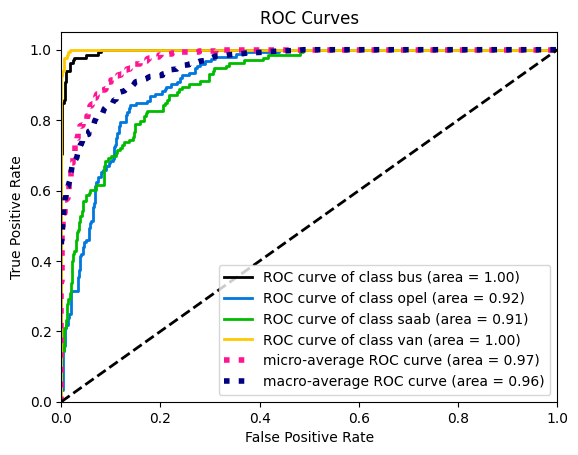

In [15]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=search.best_params_["pca__n_components"])),
        ('logistic', LogisticRegression(C = search.best_params_["logistic__C"],
                                        penalty='l2', solver='saga', tol=1e-3,
                                        max_iter=500, random_state=42))
        ])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
print("f1 micro", f1_score(y_train, y_pred, average='micro'))
print("f1 macro", f1_score(y_train, y_pred, average='macro'))
print("f1 weighted", f1_score(y_train, y_pred, average='weighted'))
print("accuracy", accuracy_score(y_train, y_pred))

plot_roc(y_train, pipe.predict_proba(X_train))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

100%|██████████| 28/28 [00:01<00:00, 27.28it/s]


cv_score optimal at depth=6
 cv_score stabilizes at depth=15


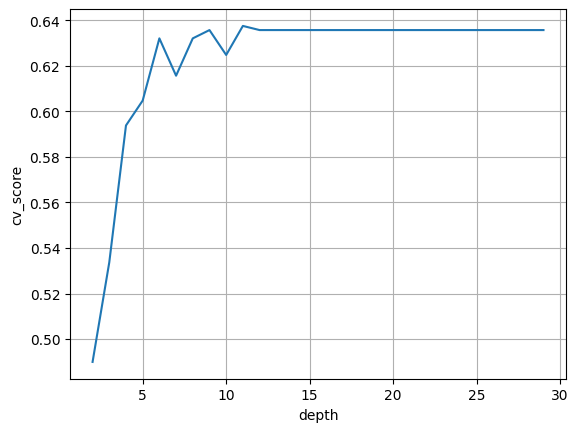

In [16]:
from sklearn.tree import DecisionTreeClassifier


cv_score = []
max_cv = 0
best_c = start
mass_of_depth = np.arange(2, 30)
for depth in tqdm(mass_of_depth):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=search.best_params_["pca__n_components"])),
        ('d3clf', DecisionTreeClassifier(random_state=42, max_depth = depth))
        ])
    # d3clf = DecisionTreeClassifier(random_state=42, max_depth = depth)
    cv = np.mean(cross_val_score(pipe, X_train, y_train, cv=3))
    cv_score.append(cv)
    if cv > max_cv:
        best_depth = depth
        max_cv = cv


best_depth = 8
print(f"cv_score optimal at depth={best_depth}")
print('\033[92m', f"cv_score stabilizes at depth=15")
plt.plot(mass_of_depth, cv_score)
plt.xlabel("depth")
plt.ylabel("cv_score")
plt.grid()

f1 micro 0.8306010928961749
f1 macro 0.8288198093456697
f1 weighted 0.8272105557191823
accuracy 0.8306010928961749


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

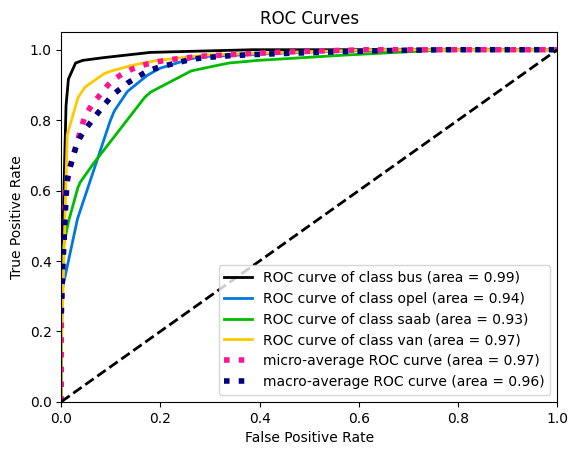

In [ ]:
# на глубине 15 cv_score уходит в ~0.635, значит дерево сильно переобучилось
# и предсказывает идеально только обучающую выборку
#
# на глубине 8 cv_score прекращает заметно расти, и дерево только только обучилось
# попробуем взять именно это значение


pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=search.best_params_["pca__n_components"])),
        ('d3clf', DecisionTreeClassifier(random_state=42, max_depth = best_depth))
        ]).fit(X_train, y_train)

y_pred = pipe.predict(X_train)
print("f1 micro", f1_score(y_train, y_pred, average='micro'))
print("f1 macro", f1_score(y_train, y_pred, average='macro'))
print("f1 weighted", f1_score(y_train, y_pred, average='weighted'))
print("accuracy", accuracy_score(y_train, y_pred))

plot_roc(y_train, pipe.predict_proba(X_train))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [18]:
from sklearn.ensemble import BaggingClassifier

[ANSWER]🚩 Оптимальное количество n = 60.

Гипперпараметры, не факт, что будут оптимальными, т.к. ансамбль немного "недообученных" деревьев вероятно будет хуже, чем ансамбль даже переобученных деревьев.

100%|██████████| 20/20 [00:12<00:00,  1.58it/s]


CPU times: user 2min 5s, sys: 122 ms, total: 2min 5s
Wall time: 2min 7s


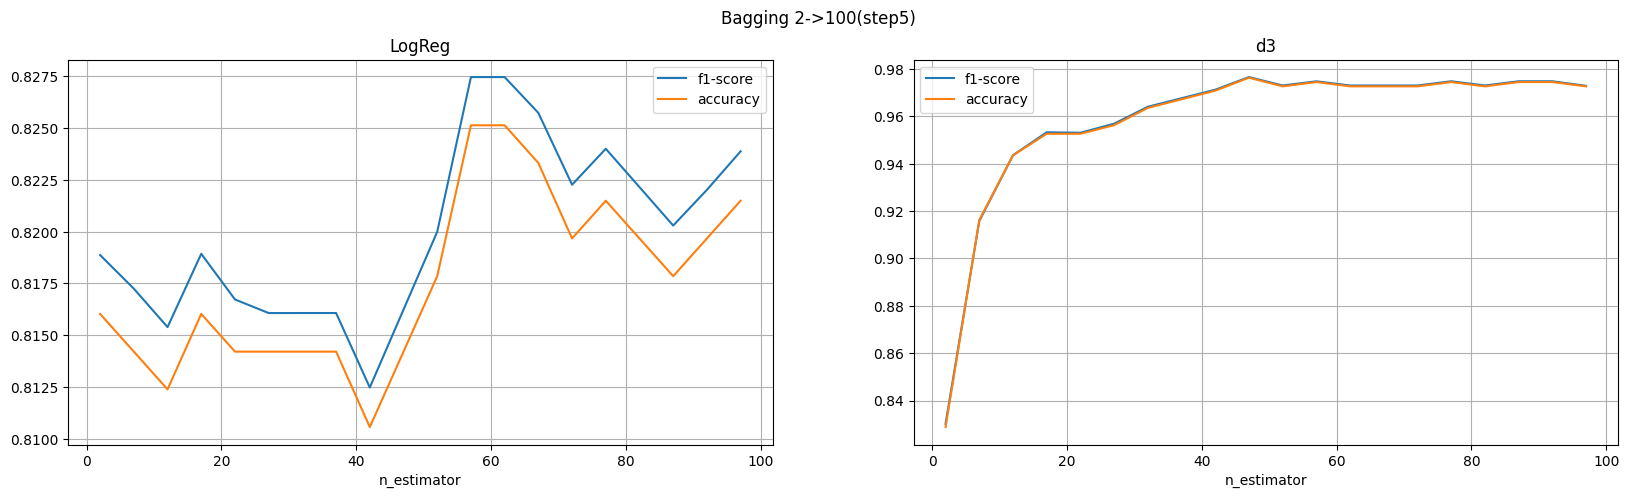

In [21]:
%%time

pipe1 = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=search.best_params_["pca__n_components"])),
        ('logistic', LogisticRegression(C = search.best_params_["logistic__C"],
                                        penalty='l2', solver='saga', tol=1e-3,
                                        max_iter=500, random_state=42))
        ])
pipe2 = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=search.best_params_["pca__n_components"])),
        ('d3clf', DecisionTreeClassifier(random_state=42, max_depth = best_depth))
        ])


models = [pipe1, pipe2]
names = ["LogReg", "d3"]

fig, ax = plt.subplots(nrows=1, ncols=len(models), figsize=(20, 5))
fig.suptitle("Bagging 2->100(step5)")

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.35, random_state=42)

for i in range(len(models)):
    n_min = 2
    n_max = 100
    step = 5
    mass_of_n = np.arange(n_min, n_max, step)
    f1 = []
    accuracy = []
    for n in tqdm(mass_of_n):
        ensemble_of_logreg = BaggingClassifier(estimator=models[i],
                                n_estimators=n, random_state=0).fit(X_train, y_train)

        y_pred = ensemble_of_logreg.predict(X_train)
        f1.append(f1_score(y_train, y_pred, average='macro'))
        accuracy.append(accuracy_score(y_train, y_pred))

    ax[i].plot(mass_of_n, f1, label = "f1-score")
    ax[i].plot(mass_of_n, accuracy, label= "accuracy")
    ax[i].set_title(names[i])
    ax[i].set_xlabel("n_estimator")
    ax[i].legend()
    ax[i].grid()


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [22]:
from sklearn.ensemble import RandomForestClassifier

[ANSWER]🚩 Оптимальное количество n = 10.

Да, отличается т.к. мы не фиксировали глубину деревьев леса, а по умолчанию она становится такой, чтобы все листья были чистыми.

100%|██████████| 13/13 [00:00<00:00, 17.76it/s]


CPU times: user 759 ms, sys: 5.01 ms, total: 764 ms
Wall time: 764 ms


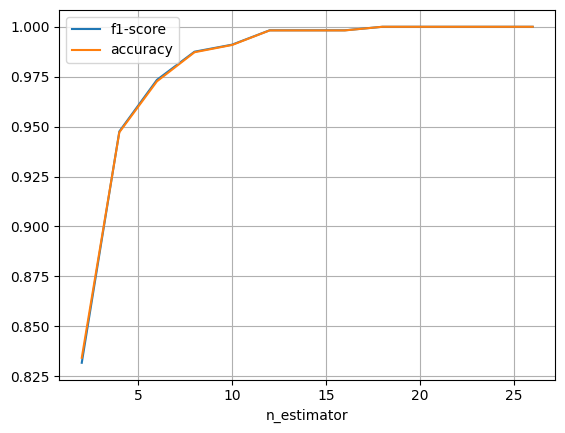

In [23]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.35, random_state=42)

n_min = 2
n_max = 27
step = 2
mass_of_n = np.arange(n_min, n_max, step)
f1 = []
accuracy = []
for n in tqdm(mass_of_n):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=search.best_params_["pca__n_components"])),
        ('rf', RandomForestClassifier(n_estimators=n, random_state=0))
        ]).fit(X_train, y_train)

    y_pred = pipe.predict(X_train)
    f1.append(f1_score(y_train, y_pred, average='macro'))
    accuracy.append(accuracy_score(y_train, y_pred))

plt.plot(mass_of_n, f1, label = "f1-score")
plt.plot(mass_of_n, accuracy, label= "accuracy")
plt.xlabel("n_estimator")
plt.legend()
plt.grid()


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

[ANSWER]🚩 Выводы следующие:

+  На, вроде как, "адекватном" разбиении 80/20 train/split, все модели показывают хороший результат, чего и следовало ожидать, ведь параметры подбирались довольно кропотливо, вероятно поэтому бэггинг логистических регрессий ни разу не проигрывает случайному лесу..



  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWar

CPU times: user 48.9 s, sys: 56.6 ms, total: 49 s
Wall time: 49.3 s


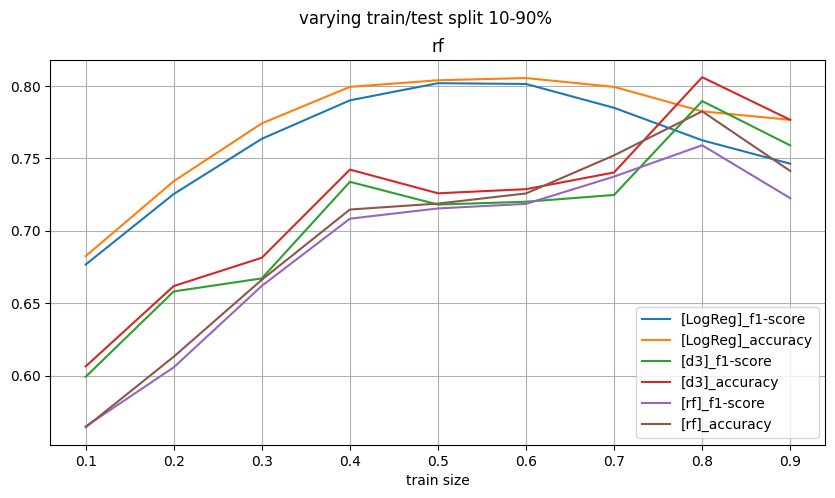

In [34]:
%%time
pca, scaler = PCA(16), StandardScaler()
preproccesor = Pipeline([
        ('scaler', scaler),
        ('pca', pca)
        ])

logistic = LogisticRegression(C = 4.2, penalty='l2', solver='saga', tol=1e-3,
                                        max_iter=500, random_state=42)
log_clf = BaggingClassifier(logistic, n_estimators=60, random_state=42)

d3 = DecisionTreeClassifier(random_state=42, max_depth = 6)
d3_clf = BaggingClassifier(d3, n_estimators=60, random_state=42)

log_pipe = Pipeline([
        ('preproccesor', preproccesor),
        ('classifier', log_clf)
        ])
d3clf_pipe = Pipeline([
        ('preproccesor', preproccesor),
        ('classifier', d3_clf)
        ])

rf_pipe = Pipeline([
        ('preproccesor', preproccesor),
        ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
        ]).fit(X_train, y_train)



models = [log_pipe, d3clf_pipe, rf_pipe]
names = ["LogReg", "d3", "rf"]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
fig.suptitle("varying train/test split 10-90%")

mass_of_splits = np.arange(0.1, 1, 0.1)
accuracy = np.ndarray((len(models), len(mass_of_splits)))
f1 = np.ndarray((len(models), len(mass_of_splits)))

for j in tqdm(range(len(mass_of_splits))):
    X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    train_size=mass_of_splits[j],
                                                        random_state=42)
    for i in range(len(models)):
        models[i].fit(X_train, y_train)
        y_pred = models[i].predict(X_test)
        f1[i][j] = f1_score(y_test, y_pred, average='macro')
        accuracy[i][j] = accuracy_score(y_test, y_pred)

for i in range(len(models)):
    ax.plot(mass_of_splits, f1[i], label = f"[{names[i]}]_f1-score")
    ax.plot(mass_of_splits, accuracy[i], label= f"[{names[i]}]_accuracy")
ax.set_title(names[i])
ax.set_xlabel("train size")
ax.legend()
ax.grid()